### 한글 워드 클라우드 : 여친선물

#### KoNLPy 설치 
- 'konlpy 오류시 참고'로 검색
- Jpype 

In [37]:
import konlpy
konlpy.__version__

'0.5.2'

In [38]:
from konlpy.tag import Okt
okt = Okt()
okt.nouns('해당 에러가 발생하는 것을 알 수 있다.')

['해당', '에러', '발생', '것', '알', '수']

### 여친 선물 : 워드 클라우드 만들기

In [39]:
with open('data/gift.txt', encoding = 'utf8') as file:
    gift_text = file.read()

In [40]:
tokens = okt.nouns(gift_text)       # 형태소 분석 한 뒤, 명사를 꺼내주세요
tokens[:10]

['반지', '목걸이', '커플', '가디건', '커플', '모자', '신지', '몇개', '추천', '제품']

In [44]:
# 한글 이외의 글자는 제거 

import re       # 정규표현식
new_tokens = []
for token in tokens:
    new_token = re.sub('[^가-힣 ]','', token)       #  정규 표현식 모듈 함수에서 중요 re.sub(패턴, 변경할 내용, 대상 문자열)  -주로 제거 할 때 多
    if new_token:                                   # 한글이 아니어서 ''이 된 글자들을 배제하기 위해 'new_token 조건 지정해서' 넣어주기 
        new_tokens.append(new_token)

In [46]:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic'


- 엉터리 단어 제거 - 수동으로 반복처리 

- 여기부터

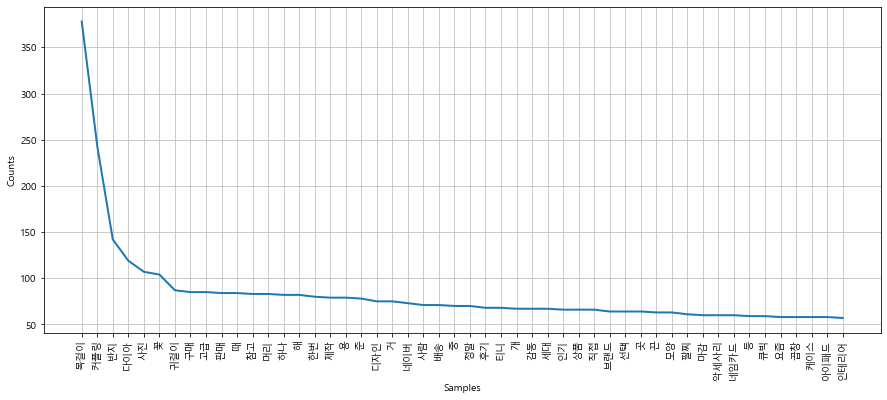

In [58]:
import nltk
gf_gift = nltk.Text(new_tokens, name='여친선물')
plt.figure(figsize=(15,6))
gf_gift.plot(50)
plt.show()

In [56]:
# stop_list =['선물', '추천', ... ] 보다는 
stop_words = '선물 추천 것 하트 가격 수 여친 커플 가능 제품 여자친구 저 제 사랑 생각 여자 분 요 더 사용'
stop_list = stop_words.split()
stop_list

['선물',
 '추천',
 '것',
 '하트',
 '가격',
 '수',
 '여친',
 '커플',
 '가능',
 '제품',
 '여자친구',
 '저',
 '제',
 '사랑',
 '생각',
 '여자',
 '분',
 '요',
 '더',
 '사용']

In [57]:
# 뉴 토큰에 있는 단어가 스탑 워즈에 있으면 제거 대상 
new_tokens_list=[]      # stop_list에 없는 뉴토큰 단어(한글로만되어있는명사)
for token in new_tokens:
    if token not in stop_list:
        new_tokens_list.append(token)
new_tokens = new_tokens_list
    

In [ ]:
# 파이썬 표현식으로 작성하면(You better use this)
stop_words = '선물 추천 것 가격 수 여친 가능 여자친구 저 제 '       # 이 부분은 엉터리 제거 반복돌리며 수정하는 부분
stop_list = stop_words.split()
new_tokens = [token for token in new_tokens if token not in stop_list] 

- 여기까지 반복수동으로

- 워드 클라우드 그리기

In [53]:
import numpy as np
from PIL import Image
from wordcloud import WordCloud

In [59]:
data = gf_gift.vocab().most_common(300)
data[:10]

[('목걸이', 378),
 ('커플링', 243),
 ('반지', 142),
 ('다이아', 119),
 ('사진', 107),
 ('꽃', 104),
 ('귀걸이', 87),
 ('구매', 85),
 ('고급', 85),
 ('판매', 84)]

In [61]:
wc = WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',
    relative_scaling=0.2,
    background_color='white'
).generate_from_frequencies(dict(data))     # 횟수로 나옴 (앨리스는 1에 상대적인 비율? 이었는데)

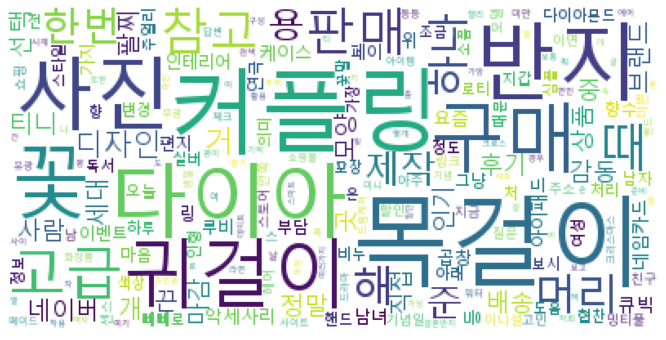

In [62]:
plt.figure(figsize=(12,6))
plt.imshow(wc)
plt.axis('off')
plt.show()

- 배경 : 하트 그림에 표시하기

In [63]:
from wordcloud import ImageColorGenerator

mask = np.array(Image.open('data/heart.jpg'))
image_colors = ImageColorGenerator(mask)

In [66]:
wc = WordCloud(
    font_path='c:/Windows/Fonts/malgun.ttf',
    relative_scaling=0.2, mask = mask,
    background_color='white',
    min_font_size=1, max_font_size=100
).generate_from_frequencies(dict(data))
default_colors = wc.to_array

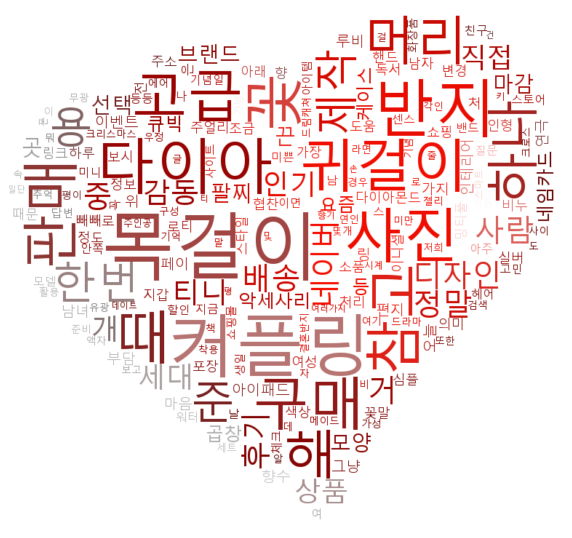

In [68]:
plt.figure(figsize=(10,10))
plt.imshow(wc.recolor(color_func = image_colors), interpolation='bilinear')
plt.axis('off')
plt.show()